Build email content spam classifier with Naive Bayes

In [8]:
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from pylab import *

# read infile - path
def readFiles(path):
    # os.walk -> go through all the desired files in directory
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message

# read data from the designated directory
def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    # only extract filename and message columns
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

# create a sub-dataframe of two columns(message + email class)
data = DataFrame({'message': [], 'class': []})

data = data.append(dataFrameFromDirectory('/Users/gezhu/Desktop/MLCourse/emails/spam', 'spam'))
data = data.append(dataFrameFromDirectory('/Users/gezhu/Desktop/MLCourse/emails/ham', 'ham'))

The CountVectorizer method can split up each message into its list of words(independent), and then apply MultinomialNB classifier on the entire list. 

In [9]:
# breakdown the dataframe into small components for NB
vectorizer = CountVectorizer()
# convert individual words into values and count how many time individual words occur
counts = vectorizer.fit_transform(data['message'].values)

# apply NB classifier
classifier = MultinomialNB()

# target value is the class(spam/ham)
targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Making prediction with manual test cases

In [10]:
# generate random info for testing
examples = ['Cellular Phone Accessories All At Below Wholesale page are free free free', "Sup bro?"]
# transform the sentence into w-count array
example_counts = vectorizer.transform(examples)

# classifier prediction
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'spam'], dtype='<U4')

ValueError: x and y must be the same size

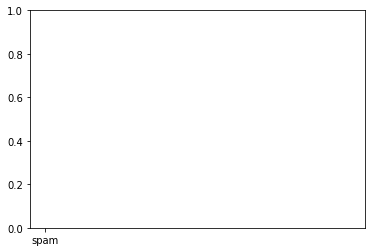